# GROUP 16 - Assignment (CS986 Fundamentals of Machine Learning)

Team Members
- Arsha Theresa Jimmy (202281102)
- Lalith Vignesh Balasubramaniam (202254365)
- Prashant Ronsa (202251507)
- Reshma Sooraj (202268201)
- Sidharth Warrier Sasthangal (202288220)
- Vaisakh Constantine Francis (202252228)

# Kaggle Competition | CS986 Spotify Problem 2023

Music is an important part of human life because it serves as a tool for entertainment, relaxation, and communication. The introduction of digital music streaming platforms, particularly Spotify, has revolutionised the music industry in recent years, allowing music fans worldwide easy access to millions of songs.

<h4> Objective of the report is to focus of the below mentioed two points

- Regression problem that aims to predict the popularity score of a song

This Notebook will provide fundamental explanations of:

- Data Handling
- Machine learning Techniques such as: Linear Regression, PCA, Decision Tree, Random Forest, SVM, Naive Base
- Libraries used: NumPy, Pandas, SciKit-Learn, Matplotlib, OneHotEncoder, RobustScaler, StandardScaler, Metrics, Seaborn, Scipy, Sklearn.decomposition

# First problem statement - "Regression Problem to predict the popularity score of a song"

Importing libraries & Regression Train dataset csv file required for the analysis

Read the contents of the CS98XRegressionTrain.csv CSV file and create a DataFrame object named 'data' that contains the file's contents. The main goal in selecting song features was to consider all elements that comprise a song's popularity and analyze the impact of the features on song popularity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler, StandardScaler
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.inspection import permutation_importance
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CS98XRegressionTrain.csv")
data.shape

(453, 15)

- From this we can gather that the data contains 15 columns (features) & 453 rows (tuples)

<h4> Renaming 'popularity' column to 'pop'

In [3]:
data.rename({'pop': 'popularity'}, axis=1, inplace=True)

<h4> Checking if there are any duplicate & null values

In [4]:
print(f'Number of duplicate values {data.duplicated().sum()}\n')
print(f'Number of null for each column values \n\n{data.isnull().sum()}')

Number of duplicate values 0

Number of null for each column values 

Id             0
title          0
artist         0
top genre     15
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64


- Column 'top genre' has different genre information all songs & since there are null values in column, we're going to fill missing values with the string "unassigned"

In [5]:
data['top genre'] = data['top genre'].fillna('unassigned')
print(f'Number of null for each column values \n\n{data.isnull().values.sum()}')

Number of null for each column values 

0


- This tells that we don't have any null values now

# Exploratory Data Analysis

Before moving on to prediction, first we will try to gather some information from that available data with some exploratory data analysis

<h3> Checking the highest popularity score for the song

In [6]:
pop_data = data.sort_values('popularity', ascending=False)
pop_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
294,295,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84
234,235,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,83
263,264,Africa,TOTO,album rock,1982,93,37,67,-18,5,73,296,26,3,83
337,338,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
162,163,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,75,215,11,16,82


- The above table provides information that the top popularity score for the songs in the dataset, with 'Bohemian Rhapsody - 2011 Mix' from the artist 'Queen' at a popularity score of 84, which is under the genre 'glam rock' originally released in the year 1975.
- Followed by the artists such as Coldplay, TOTO with popularity score of 83 & The Beatles with popularity score of 82
- Also, Queen has two songs with high popularity score of 84 & 82
- The lowest popularity score for any artist in the dataset is 26

<Figure size 432x432 with 0 Axes>

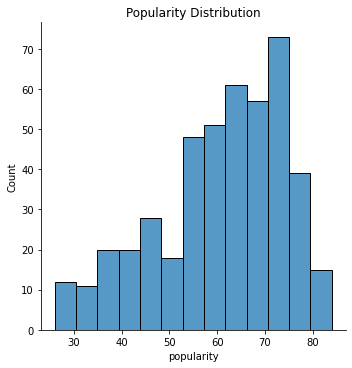

In [7]:
plt.figure(figsize=(6,6))
sns.displot(data['popularity'])
plt.title('Popularity Distribution')
plt.show()

<h3> In order to predict the popularity score of a song, we're going to check the correlation of popularity with other features of the dataset

Checking Correlation will help us identify if there are any features that are responsible for influencing the popularity score of a song in this dataset

Plotting a heatmap visualization of the correlation matrix for the DataFrame 'data'

<AxesSubplot:>

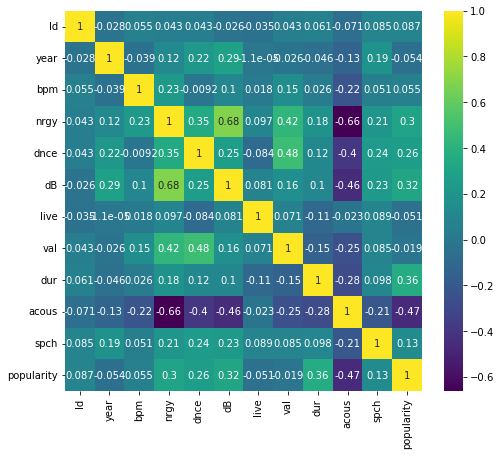

In [8]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

- The heatmap visualisation above depicts the correlations between all the features in the DataFrame, with lighter colour representing higher correlation values and darker colour having negative correlation.
- Features dur, dB, and nrgy were found to have a high positive correlation with target variable popularity.
- Features 'live', 'val' 'year', 'acous', 'spch' & 'bpm have negative corelation to popularity.

<AxesSubplot:xlabel='Year', ylabel='Popularity Mean'>

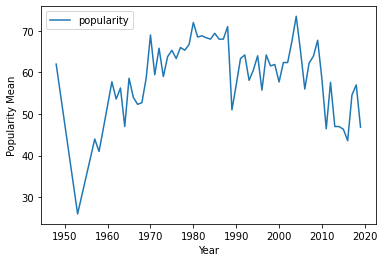

In [9]:
pop_mean = data.groupby('year').agg({"popularity": "mean"})
pop_mean.plot(xlabel="Year",ylabel="Popularity Mean") 

In the above trend gragh between popularity and year it can be clearly visualised that there is clear relationship between year and popularity which should be further explored.

# Pre-processing and feature engineering

Id and title column can be dropped since they don't have much reation to popularity. However, title can be used to check the mood of the song which might affect popularity of the song.

In [10]:
data.drop(['Id','title'],axis=1,inplace=True)

<h3> Splitting genre column

We can use the genre colum and split the song's genre to it's core. This allows us to analyze the data more effectively, build more accurate models, and make the data more consistent.

In [11]:
genre = (data["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data['genre'] = new_genre.tolist()
data.drop(columns=['top genre'],axis=1,inplace=True)

- Grouping infrequent genres in a DataFrame's 'genre' column into a single category called 'others'. This is accomplished by identifying all genres that appear less than three times in the column and replacing them with 'others'. This method has the potential to simplify the analysis of a dataset that contains a large number of infrequent categories in a column.

In [12]:
v = data['genre'].value_counts()
data.loc[data['genre'].isin(v[v<3].index), 'genre'] = 'others'

<h3> Outlier Check

<AxesSubplot:>

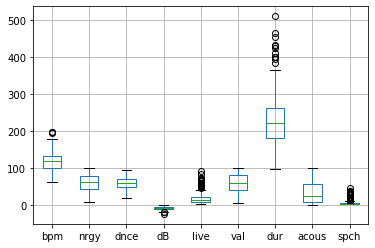

In [13]:
scl_attr = [ 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch']
data.boxplot(scl_attr)

It can be observed that there are many outliers particularly in duration as well as liveness, It was decided not to remove the outliers from the dataset, as it would reduce the sample size, in addition, it would also cause sampling bias, would affect the distribution and finally it would also affect the data completeness.

<h2> Feature Engineering

To calculate the mean values of the "nrgy", "dnce", "dB", "acous", and "spch" columns for each artist in the dataset and create new features in the dataset that contain the mapped mean values for each artist. This technique can be useful for feature engineering in machine learning models that predict song popularity or other metrics based on artist characteristics.

<h3> Transforming 'artist' column on the basis of value counts of artists

In [14]:
count = data['artist'].value_counts()
data['value_count'] = data['artist'].apply(lambda x: count[x])
data['artist'] = data['value_count'].apply(lambda x: round(x/7,2))
data.drop(columns=['value_count'],axis=1,inplace=True)

Data in artist column is converted based on the number of times an artist appear in the dataset. It is helpful for the model to look into the importance if artist within the datset.

In [15]:
data['dur'] = np.log2(data['dur'])
data['nrgy'] = np.log2(data['nrgy'])
data['bpm'] = np.log2(data['bpm'])
# data.head

while checking the correlation and the linearity of features duration, energy and bpm with label popularity in the exploratory data analysis stage it was noticed that the former features exhibhited non linearity. It was important to transform the features, for this purpose we employed 
1. Boxcox Transformation
2. Quantile Transformation
3. Square root transformation 
4. Log Transform
##### after acessing and checking the improvement in linearity as well as correlation, it was decided to adopt log transformation to the features which improved the model prediction.

<h3> Scale audio attributes

In [16]:
scl_attr = ['artist','year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch']
scaler = StandardScaler()
std_df = scaler.fit(data[scl_attr])
std_df_scaled = scaler.transform(data[scl_attr])
data[scl_attr] = pd.DataFrame(std_df_scaled)

After careful inspection we observed that there is a considerable scale difference between different features, Moreover it was very intuitive to apply a scaler to transform the features and label, owing to the fact that most of machine learning algorithms are very sensitive to data, and its better to scale before employing any algorithm. for this purpose we employed standard scaler which substracts the mean of the feature from each observation and it is divided by its standard deviation, which keeps the feature centred around 0.

# Transformation

# Principal Component Analysis (PCA)

In [17]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(data[scl_attr])

This code performs PCA (Principal Component Analysis) on the selected features in the 'data' dataframe. Then components parameter is set to 5, which means that the algorithm will reduce the dimensionality of the selected features to 5 principal components.


By reducing the dimensionality of a dataset, PCA can help to simplify the data and make it easier to analyze. It can also be used to visualize high-dimensional data in a lower-dimensional space, as well as to remove noise and redundant information from a dataset.

In [18]:
x_data = data[[]]

In [19]:
data = pd.concat([data[['popularity','genre']].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')
# data.head

# OneHot Encoder

Perform one-hot encoding on the 'genre' column of DataFrame named 'data'. One-hot encoding is a process of converting categorical data into a binary representation that can be used for machine learning models.


We tried One-hot encoding vs Label encoding and On-hot encoding seems to be performing better for the model accuracy.

In [20]:
oh = OneHotEncoder(handle_unknown='ignore')
oh_genre = pd.DataFrame(oh.fit_transform(data[["genre"]]).toarray())
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(oh_genre)], axis='columns')
data.drop(columns='genre',inplace=True)

<h2> Seperation of features and target variables

In the dataset all the independent variables(features) are stored into x and the predicted dependent variable popularity is stored in y. This is employed to fit x and y while training the model with machine learning algorithms.

In [21]:
x= data.loc[:, data.columns != 'popularity']
y = data[['popularity']]
#x.head

# Linear Regression Model

To perform linear regression modeling using the scikit-learn library. The instance 'clf' will be used to train and make predictions using the linear regression model. Then the linear regression model is trained using the input features in 'x' and the target variable in 'y'.

In [22]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [23]:
print(clf.score(x,y))

0.43206351662283105


In [24]:
y_train_pred = clf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

10.14005399814071


In [25]:
clf.predict(x)

array([[51.13773566],
       [38.87943735],
       [60.90464645],
       [58.03617064],
       [71.94019193],
       [65.98048499],
       [63.93998809],
       [65.075325  ],
       [29.77127595],
       [47.56978931],
       [63.00788234],
       [81.39805467],
       [57.52179829],
       [44.52942557],
       [53.42353597],
       [51.68125242],
       [59.80091211],
       [61.00999677],
       [59.04069804],
       [61.02491827],
       [61.38307177],
       [62.33061176],
       [65.42614406],
       [60.00384042],
       [49.01235783],
       [61.75613321],
       [32.10602763],
       [56.24641221],
       [49.17630312],
       [69.14045788],
       [65.02319955],
       [67.87044364],
       [61.09008338],
       [69.28307624],
       [50.8759049 ],
       [45.57322809],
       [65.56661457],
       [68.76735255],
       [63.68032383],
       [73.97412587],
       [65.23993424],
       [64.95319276],
       [53.3797617 ],
       [66.21717694],
       [58.18921763],
       [65

In [26]:
y_train_pred = clf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

10.14005399814071


The calculated R-squared value measures how well the model fits the data, with a value of 1 indicating aperfect fit. Here the R-squared value so obtained is 0.4382

The mean_squared_error() function from the sklearn.metrics module is used to calculate the mean squarederror, and the squared parameter is set to False to return the RMSE instead of the squared error. The so obtained RMSE is 10.0845

Then the trained model is used to make predictions on the input features in 'x'. The predict() method of theLinearRegression class is used to make the predictions, and the resulting predictions are returned.

In [27]:
print('Coefficients: ', clf.coef_)
print(clf.intercept_)

Coefficients:  [[ -2.73468978  -4.31745034   0.095728    -0.21586883   1.04013057
   -0.05564781 -10.96984991   0.70507979  -0.81215995  -2.68174359
    1.61795507   0.2107514    1.5844927    2.25746336   3.1183311
   -6.86534689   6.33446877  12.42153721  -0.88286608   1.80538662
    3.44128307   2.40633572   0.88288606 -14.51835663]]
[59.54372564]


In a multiple linear regression model, the coefficients represent the amount of change in the dependent variable (i.e., the variable being predicted) associated with a one-unit change in each independent variable (i.e., the variables used to make the prediction).

For instance, here the dependent is popularity and acousticness has a negative variation 1 unit change in acoustiness results in -14.51 change in popularity.

The intercept represents the predicted value of the dependent variable when all the independent variables are equal to zero.

# Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

This is done to create a Decision Tree Regressor model and fits it on input and output data, prints the R-squared value to evaluate the goodness of fit, makes predictions using the fitted model, calculates theRMSE to evaluate the prediction accuracy, and prints the RMSE value.
    
The Decision Tree Regressor model object is created with a random state of 0. The random state is used tomake the results reproducible.

Then the Decision Tree Regressor model is made to fit on the input data x and output/target data y.

In [29]:
print(dtr.score(x,y))

1.0


The R-squared value of the Decision Tree Regressor model is generated. The R-squared value is a statisticalmeasure that represents the proportion of the variance in the dependent variable that is explained by theindependent variables in the model. A higher R-squared value indicates a better fit of the model. The Rsquared value obtained for the model is 1

In [30]:
y_train_pred = dtr.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

0.0


The root mean squared error (RMSE) between predicted and actual output values (y train pred) is calculated. The root mean square error (RMSE) is a popular metric for assessing the performance of regression models. It computes the average difference between predicted and observed values in the same units as the target variable.. Here the RMSE value obtained is 0.

# Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x,y);

Here a Random Forest Regressor model is created, fits it on input and output data, prints the R-squaredvalue to evaluate the goodness of fit, makes predictions using the fitted model, calculates the RMSE toevaluate the prediction accuracy, and prints the RMSE value. We tried to create a Random Forest Regressormodel object with 1000 trees and a random state of 42 and to fit the Random Forest Regressor model on the input data x and output data y.

In [32]:
print(rf.score(x,y))

0.9155704620755731


R-squared value of the Random Forest Regressor model is calculated. The R-squared value is a statisticalmeasure that represents the proportion of the variance in the dependent variable that is explained by theindependent variables in the model. A higher R-squared value indicates a better fit of the model.The Rsquared value of the obtained model is 0.91551

In [33]:
y_train_pred = rf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

3.9096473870349517


The root mean squared error (RMSE) between the predicted output values (y_train_pred) and the actual output values (y) is calculated.
    
RMSE is a commonly used metric to evaluate the performance of regression models. It measures the average difference between the predicted and actual values in the same units as the target variable.
    
The RMSE value obtained for the predictions is 3.9108

In [34]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(rf, x, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)

[11.05090514  9.19221919  9.96586767  8.6869323  11.38698535 12.65681366
 11.14714414 10.56984336 11.0473861   9.80312531]


For a random forest regressor, the cross-validation scores provide an estimate of the model's ability to generalize to new data. Higher cross-validation scores indicate better performance, while lower scores suggest that the model may be overfitting to the training data or not capturing important patterns in the data.

Here, the data is not under-fitting and is able to predict the label value i.e., popularity with fairly good accuracy.

In [35]:
rf.predict(x)

array([45.86 , 39.794, 72.224, 65.769, 65.765, 73.08 , 52.593, 69.578,
       34.595, 36.803, 65.244, 70.307, 40.805, 39.434, 52.604, 43.581,
       50.776, 65.563, 58.237, 71.676, 71.232, 68.337, 64.187, 64.095,
       43.852, 61.757, 32.961, 58.273, 56.161, 70.466, 74.196, 70.59 ,
       63.471, 70.888, 70.374, 33.786, 66.138, 49.095, 69.568, 65.3  ,
       59.796, 70.421, 59.618, 66.663, 61.318, 62.643, 59.618, 72.194,
       69.379, 73.772, 59.588, 61.273, 60.459, 62.696, 67.177, 39.237,
       68.557, 35.358, 69.216, 67.93 , 66.465, 55.665, 73.492, 47.327,
       66.268, 69.494, 67.384, 50.373, 37.53 , 74.293, 63.963, 73.465,
       31.855, 49.592, 71.737, 70.123, 62.972, 49.158, 43.31 , 65.988,
       48.997, 39.546, 67.626, 44.02 , 61.363, 65.654, 69.842, 38.815,
       55.251, 69.883, 34.269, 62.838, 69.063, 49.431, 74.779, 52.243,
       54.719, 70.04 , 39.151, 68.556, 57.471, 66.214, 58.536, 50.42 ,
       50.39 , 47.143, 68.546, 47.465, 71.245, 59.375, 68.876, 60.261,
      

# Preparation of Test Data

It is important to ensure that the test data is representative of the real-world data that the model will encounter and to preprocess the data in the same way as the training data to ensure that the evaluation metrics accurately reflect the performance of the model.

Pre-processing of the test data in the same way as the training data is done. This includes removal of nullvalues and replacing the same by string 'unassigned'.
Splitting of the genre column into sub-genres is auseful technique in the analysis of the DataFrame.
Grouping of infrequent genres in the 'genre' column of aDataFrame into a single category called 'others'

In [36]:
data_test = pd.read_csv("CS98XRegressionTest.csv")
# data_test.isna().sum()

In [37]:
data_test['top genre'] = data_test['top genre'].fillna('unassigned')
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)
# data_test.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)
data_test.drop(['Id','title'],axis=1,inplace=True)

In [38]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(rf, x, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)

[11.05090514  9.19221919  9.96586767  8.6869323  11.38698535 12.65681366
 11.14714414 10.56984336 11.0473861   9.80312531]


In [39]:
data_test['dur'] = np.log2(data_test['dur'])
data_test['nrgy'] = np.log2(data_test['nrgy'])
data_test['bpm'] = np.log2(data_test['bpm'])

In [40]:
genre = (data_test["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data_test['genre'] = new_genre.tolist()
data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [41]:
v = data_test['genre'].value_counts()
data_test.loc[data_test['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [42]:
count = data_test['artist'].value_counts()
data_test['value_count'] = data_test['artist'].apply(lambda x: count[x])
data_test['artist'] = data_test['value_count'].apply(lambda x: round(x/7,2))
data_test.drop(columns=['value_count'],axis=1,inplace=True)

<h3> Performing feature scaling on the selected columns in the test data dataframe

In [43]:
std_df_scaled_t = scaler.transform(data_test[scl_attr])
data_test[scl_attr] = pd.DataFrame(std_df_scaled_t)
data_test.head

<bound method NDFrame.head of        artist      year       bpm      nrgy      dnce        dB      live  \
0   -0.534855  0.808965  1.322181  1.088085  0.351377  1.633434  4.143519   
1    0.639930  0.152545  1.527775 -0.686977 -1.911453 -1.724866 -0.489118   
2    1.207068 -0.861921 -2.738981 -0.349792 -2.105410  0.514000 -0.416733   
3   -0.534855  1.107337  0.430621  1.066003  0.739291 -0.045716  1.392891   
4   -0.534855  1.584733 -0.028443 -0.349792 -0.230493 -0.885291  0.234732   
..        ...       ...       ...       ...       ...       ...       ...   
109 -0.534855  0.808965  0.357205  0.088153  0.092768  0.234142  1.465276   
110 -0.534855  1.107337  0.538605  0.998288  0.480682  0.793859 -0.561503   
111  0.072793  0.152545 -1.481259  0.123677  1.191857  0.514000 -0.271963   
112 -0.534855 -0.802247  0.430621  1.174101  0.803943  1.073717 -0.416733   
113 -0.534855 -0.324851  0.282605  0.998288 -0.424450  1.353575  0.813811   

          val       dur     acous      spch  

In [44]:
xtest_pca = pca.transform(data_test[scl_attr])

In [45]:
data_test = pd.concat([data_test[['genre']].reset_index(drop=True), pd.DataFrame(xtest_pca)], axis='columns')
data_test.head

<bound method NDFrame.head of       genre         0         1         2         3         4
0       pop -3.099386  1.712066  0.736146  3.651921  0.407580
1      rock  1.864105 -1.988405 -0.400442  0.761958 -1.978535
2      rock  2.268015 -1.468468  0.921335  0.917714  1.384738
3    others -1.408465  0.572316  0.375566  0.870166 -0.196337
4    others  0.726359  0.816336  1.095722  0.220215 -0.721940
..      ...       ...       ...       ...       ...       ...
109     hop -2.792882  1.576403  3.160763  1.418422 -0.060258
110   dance -1.872606  0.381461 -0.016630 -0.503757 -0.632690
111     hop -1.456412  0.280807  2.211018 -0.893350  1.322141
112   disco -2.361944 -0.431816 -0.174613 -0.255724 -0.391360
113  others -1.566309  0.110133 -0.719148  1.080214 -0.129559

[114 rows x 6 columns]>

<h3> Perform feature transformation on the selected columns in the test data dataframe

In [46]:
oh_genre_t = pd.DataFrame(oh.transform(data_test[["genre"]]).toarray())
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_genre_t)], axis='columns')
data_test.drop(columns='genre',inplace=True)
data_test.head(2)

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,-3.099386,1.712066,0.736146,3.651921,0.407580,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.864105,-1.988405,-0.400442,0.761958,-1.978535,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
type(data_test)

pandas.core.frame.DataFrame

<h3> Tested the Linear Regression Model(clf) and Random Forest regression model(rf) on the test data and made predictions

In [48]:
spotify_pred = clf.predict(data_test)
spotify_pred

array([[62.13927911],
       [64.21134681],
       [64.45312869],
       [59.6855252 ],
       [52.45644648],
       [62.94496754],
       [57.20119214],
       [46.59189152],
       [61.8782489 ],
       [67.01954615],
       [52.94566069],
       [68.17467996],
       [54.53304378],
       [58.73518449],
       [67.73954217],
       [66.32472257],
       [58.72000096],
       [62.30355731],
       [63.66572526],
       [62.59631399],
       [55.25008436],
       [57.64095375],
       [51.39801221],
       [48.65205995],
       [52.56844985],
       [67.44359402],
       [62.72670326],
       [58.36018557],
       [51.16038255],
       [65.53002173],
       [67.60110649],
       [52.37564425],
       [66.50712759],
       [64.77252925],
       [65.01636227],
       [65.21719754],
       [63.03725103],
       [54.48000872],
       [60.90090352],
       [64.81227643],
       [62.75899225],
       [65.23144836],
       [66.28790204],
       [53.79534808],
       [56.10195574],
       [59

In [49]:
spotify_pred = rf.predict(data_test)
spotify_pred

array([61.133, 64.789, 64.959, 63.731, 44.438, 64.554, 64.725, 41.163,
       66.329, 63.266, 43.555, 66.489, 52.171, 62.097, 60.988, 63.361,
       63.557, 64.617, 69.353, 64.507, 61.838, 58.15 , 52.42 , 51.24 ,
       46.83 , 64.974, 65.111, 62.364, 40.973, 69.634, 71.339, 47.029,
       69.648, 68.037, 65.152, 66.42 , 69.47 , 60.851, 65.115, 64.505,
       67.304, 65.664, 66.46 , 41.422, 65.352, 56.2  , 67.889, 64.745,
       65.373, 62.481, 48.993, 67.332, 66.391, 51.736, 60.998, 64.298,
       68.009, 55.584, 68.746, 50.981, 62.858, 66.335, 61.473, 65.103,
       65.597, 65.549, 61.696, 61.875, 64.565, 64.726, 67.603, 42.713,
       54.902, 69.493, 63.633, 70.849, 68.404, 55.596, 68.98 , 54.402,
       63.637, 61.74 , 44.356, 66.42 , 48.415, 63.271, 68.717, 64.055,
       43.038, 65.661, 37.588, 64.532, 64.324, 63.413, 63.274, 68.374,
       63.515, 59.078, 64.462, 43.709, 53.539, 64.248, 65.181, 43.85 ,
       39.255, 66.27 , 61.604, 64.607, 54.449, 60.194, 61.72 , 67.1  ,
      

In [50]:
data_sub = pd.read_csv("CS98XRegressionTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T
spotify_submit.size

114

In [51]:
spotify_submit['pop'] = pd.DataFrame(spotify_pred.round().astype(int))
spotify_submit.to_csv('spotify_submit_preds_rf.csv',index=False)
spotify_submit.head

<bound method NDFrame.head of       Id  pop
0    454   61
1    455   65
2    456   65
3    457   64
4    458   44
..   ...  ...
109  563   60
110  564   62
111  565   67
112  566   64
113  567   63

[114 rows x 2 columns]>

<AxesSubplot:>

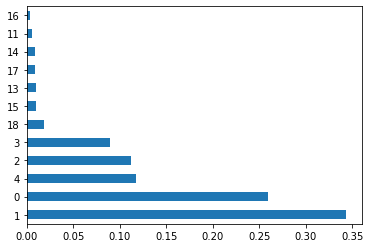

In [52]:
#bar plot for test data columns

feat_importances = pd.Series(rf.feature_importances_, index=data_test.columns)
feat_importances.nlargest(12).plot(kind='barh')

# Conclusion

Based on the metrics scores Random Forest Regressor performed well in predicting the label value that is popularity, other machine learning algorithms as well as hyper-parameter tuning was also done to improve the model robustness. The resultant popularity scores were converted into a csv file to cross reference with fifty percent test data in kaggle. The public score in kaggle is 6.84028 which is based on the 50% data available for comparison in kaggle. This seems to be a very good score for a dataset with categorical features and limited number of rows(453 rows). Further methods should be explored to improve the accuracy.